In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
df=pd.read_csv('C:/Users/dbda/PycharmProjects/statistics/Dataset/tips.csv')

In [6]:
#Extract the 'tip' column
tips=df['tip']

In [19]:
#Hypothesized mean:H0=Population average tip value is $2.75
mu_0=2.98
#mu_0=2.99 #uncomment to test with this value later

In [20]:
#Calculate sample statistics
sample_mean=tips.mean()
sample_std=tips.std()
n=len(tips)

In [21]:
#compute the standard error
standard_error=sample_std/np.sqrt(n)
#Compute the z-score
z_stat=(sample_mean-mu_0)/standard_error


In [22]:
#Determine the critical z values of alpha
alpha= 0.05
critical_z_two_tail=norm.ppf(1-alpha/2) 
#Display result
print(f"Sample Mean:{sample_mean:.2f}")
print(f"Sample std Dev:{sample_std:.2f}")
print(f"Z-Statistic :{z_stat:.2f}")
print(f"Critical Z (Two-Tailed):+-{critical_z_two_tail:.2f}")

Sample Mean:3.00
Sample std Dev:1.38
Z-Statistic :0.21
Critical Z (Two-Tailed):+-1.96


In [23]:
#Interpreat results for two-tailed test
if abs(z_stat) > critical_z_two_tail:
    print("Reject the null hypothesis for the two-tailed test.")
else:
     print("Fail to reject the null hypothesis for the two-tailed test.")

Fail to reject the null hypothesis for the two-tailed test.


In [26]:
 p_value_two_tailed=2*(1-norm.cdf(abs(z_stat)))
print(f"P value (Two-Tailed):{p_value_two_tailed:.4f}")

#Interpreat results at aplha = 0.05
#p values tells us theoritical probability of some thing happening H0 is true
if p_value_two_tailed < alpha:
    print("Reject the null hypothesis for the two-tailed test.")
else:
     print("Fail to reject the null hypothesis for the two-tailed test.")
    

P value (Two-Tailed):0.8365
Fail to reject the null hypothesis for the two-tailed test.


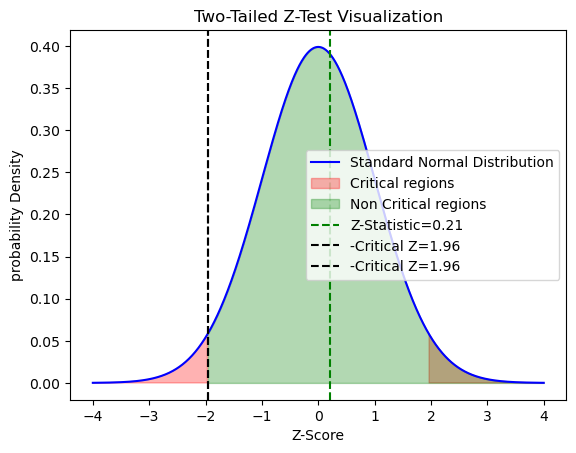

In [29]:
x=np.linspace(-4,4,1000)
y=norm.pdf(x)
plt.plot(x,y,label="Standard Normal Distribution",color="blue")

#critical region
plt.fill_between(x,0,y,where=(x<= -critical_z_two_tail)|(x>=critical_z_two_tail),color="red",alpha=0.3,label="Critical regions")
plt.fill_between(x,0,y,where=(x > -critical_z_two_tail)|(x>=critical_z_two_tail),color="green",alpha=0.3,label="Non Critical regions")
#Mark z-statistics
plt.axvline(z_stat,color="green",linestyle="--",label=f"Z-Statistic={z_stat:.2f}")

#Annotate critical z-values
plt.axvline(-critical_z_two_tail,color="black",linestyle="--",label=f"-Critical Z={critical_z_two_tail:.2f}")
plt.axvline(-critical_z_two_tail,color="black",linestyle="--",label=f"-Critical Z={critical_z_two_tail:.2f}")

plt.title("Two-Tailed Z-Test Visualization")
plt.xlabel("Z-Score")
plt.ylabel("probability Density")
plt.legend()
plt.show()